# _Relatório 4 PEL 201_

___

**Aluno**:Juliano Alves de Oliveira.
**R.A**:1173095

**Linguagem utilizada**=Python

## Multiplicação de matrizes em cadeia

___

O algoritmo de multiplicação de matrizes em cadeia se basei no princípio de resolver o problema global de forma local e menor, sendo que em cada etapa se armazena a melhor forma de se resolver o problema. Exemplo:

Para um caso de 6 matrizes podemos dividir o problema da seguinte maneira.

1. encontrar a melhor forma de multiplicar a matriz em agrupamentos de 2 em 2;
2. encontra-se a melhor forma de se multiplicar a matriz divindindo o problema em agrupamentos de 3 em 3, considerando valores obtidos na etapa anterior;
3. O processo continua com os agrupamentos, sempre utilizando os melhores resultados obtidos na etapa anterior e guardando o melhor resultado da etapa presente;
4. A o fim do processo existe um "caminho" das melhores multiplicações que vai trazer o melhor agrupamento de matrizes para o presente problema;


In [2]:
def matrix_product(p):
    length = len(p)
    m = [[-1]*length for _ in range(length)]
    s = [[-1]*length for _ in range(length)]
 
    matrix_product_helper(p, 1, length - 1, m, s)
 
    return m, s

In [3]:
def matrix_product_helper(p, start, end, m, s):
    if m[start][end] >= 0:
        return m[start][end]
 
    if start == end:
        q = 0
    else:
        q = float('inf')
        for k in range(start, end):
            temp = matrix_product_helper(p, start, k, m, s) \
                   + matrix_product_helper(p, k + 1, end, m, s) \
                   + p[start - 1]*p[k]*p[end]
            if q > temp:
                q = temp
                s[start][end] = k
 
    m[start][end] = q
    return q

In [16]:
def print_parenthesization(s, start, end):
    if start == end:
        print('A[{}]'.format(start), end='')
        return
 
    k = s[start][end]
 
    print('(', end='')
    print_parenthesization(s, start, k)
    print_parenthesization(s, k + 1, end)
    print(')', end='')
 

In [110]:
import numpy as np

In [256]:
rows10 = np.random.randint(100, size=(10,))
col = np.random.randint(100, size=(1,))

In [257]:
rows30 = np.concatenate((rows10,np.random.randint(100, size=(20,))))

In [258]:
rows50 = np.concatenate((rows30,np.random.randint(100, size=(20,))))

In [259]:
p10 = np.concatenate((rows10,col))
m10, s10 = matrix_product(p10)

In [260]:
p30 = np.concatenate((rows30,col))
m30, s30 = matrix_product(p30)

In [261]:
p50 = np.concatenate((rows50,col))
m50, s50 = matrix_product(p50)

### Resultados para 10 matrizes

In [262]:
print('Numero de interacoes para 10 matrizes = ', m10[1][10])
print_parenthesization(s10, 1, 10)

Numero de interacoes para 10 matrizes =  90080
((A[1]A[2])(((((((A[3]A[4])A[5])A[6])A[7])A[8])A[9])A[10]))

### Resultado para 30 matrizes

In [263]:
print('Numero de interacoes para 100 matrizes = ', m30[1][30])
print_parenthesization(s30, 1, 30)

Numero de interacoes para 100 matrizes =  404625
((A[1](A[2](A[3](A[4](A[5](A[6](A[7](A[8](A[9](A[10](A[11](A[12](A[13](A[14](A[15](A[16](A[17](A[18](A[19](A[20](A[21](A[22](A[23](A[24](A[25]A[26])))))))))))))))))))))))))(((A[27]A[28])A[29])A[30]))

### Resultado para 50 matrizes

In [264]:
print('Numero de interacoes para 500 matrizes = ', m50[1][50])
print_parenthesization(s50, 1, 50)

Numero de interacoes para 500 matrizes =  616752
((A[1](A[2](A[3](A[4](A[5](A[6](A[7](A[8](A[9](A[10](A[11](A[12](A[13](A[14](A[15](A[16](A[17](A[18](A[19](A[20](A[21](A[22](A[23](A[24](A[25](A[26](A[27](A[28](A[29](A[30](A[31](A[32](A[33](A[34](A[35](A[36](A[37](A[38](A[39]A[40])))))))))))))))))))))))))))))))))))))))(((((((((A[41]A[42])A[43])A[44])A[45])A[46])A[47])A[48])A[49])A[50]))

### Resultados

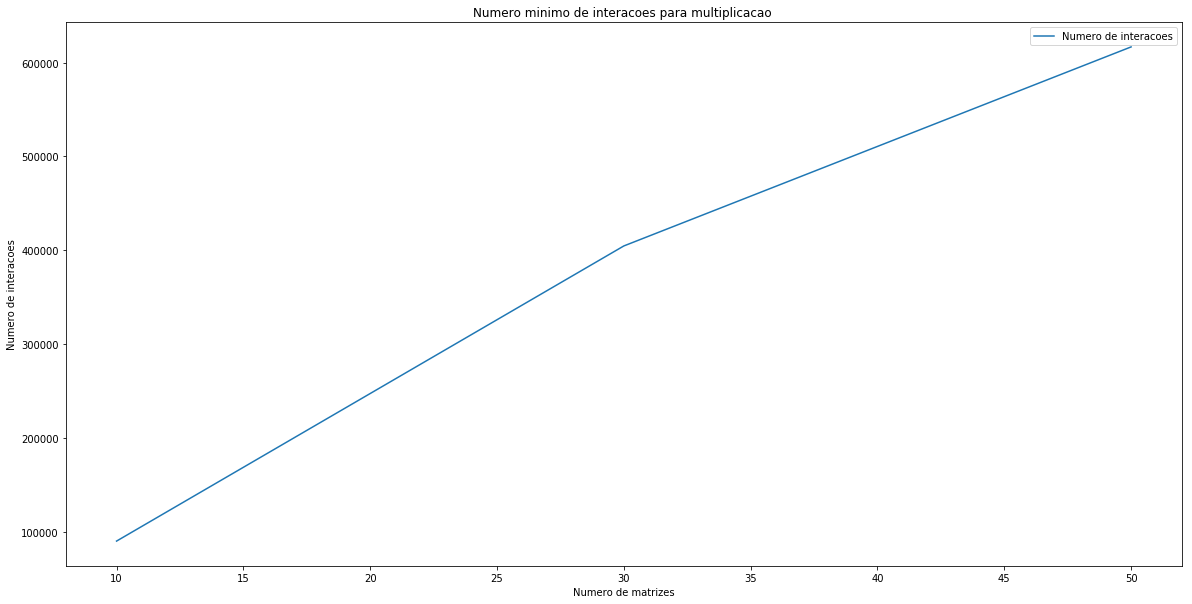

In [266]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
interactions,=plt.plot([10,30,50],[m10[1][10],m30[1][30],m50[1][50]],label='Numero de interacoes')
plt.legend(handles=[interactions])
plt.title("Numero minimo de interacoes para multiplicacao ")
plt.xlabel('Numero de matrizes')
plt.ylabel('Numero de interacoes')
plt.show()

Apesar de conter poucos pontos, é possível observar uma tendência assintotica do gráfico com o crescimento do número de matrizes na cadeia.